# Análise Exploratória — Dataset PAR (Ajustado p/ `training_set.txt`)

Este notebook foi gerado para funcionar com o arquivo **`training_set.txt`** cujo formato é:

```
image_path, upper_color, lower_color, gender, bag, hat
```

**Ordem das features** (confirmada): `['upper_color', 'lower_color', 'gender', 'bag', 'hat']`

- **Cores (upper_color / lower_color)**: inteiros em {1..11} mapeando para  
  `1:black, 2:blue, 3:brown, 4:gray, 5:green, 6:orange, 7:pink, 8:purple, 9:red, 10:white, 11:yellow`
- **gender**: `0=male`, `1=female`
- **bag**: `0=ausente`, `1=presente`
- **hat**: `0=ausente`, `1=presente`


In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regras locais para plots neste notebook
# - Apenas matplotlib (sem seaborn)
# - Um gráfico por figura (sem subplots)
# - Não definir cores específicas

plt.rcParams.update({
    "figure.figsize": (10, 5),
    "axes.grid": True
})


## 1. Carregamento dos Dados

Tente primeiro o caminho local (`./training_set.txt`). Se não existir, tenta o caminho do ambiente atual (`/mnt/data/training_set.txt`).

In [2]:
import pandas as pd
import os


train_file = "/home/gdaudt/Área de trabalho/Projeto-Transformador-II/data/PAR2025/training_set.txt"

# Verifica se o caminho literal definido existe
if not os.path.exists(train_file):
    raise FileNotFoundError(
        f"Arquivo '{train_file}' não encontrado no caminho especificado. "
        "Por favor, verifique a variável 'train_file'."
    )

print(f"Usando arquivo: {train_file}")

# O arquivo está em CSV separado por vírgula (sem cabeçalho)
colunas = ["image_path", "upper_color", "lower_color", "gender", "bag", "hat"]
df = pd.read_csv(train_file, header=None, names=colunas, sep=",")

# Tipos esperados
df["upper_color"] = df["upper_color"].astype(int)
df["lower_color"] = df["lower_color"].astype(int)
df["gender"]      = df["gender"].astype(int)
df["bag"]         = df["bag"].astype(int)
df["hat"]         = df["hat"].astype(int)

print("DataFrame carregado com sucesso:")
df.head()

Usando arquivo: /home/gdaudt/Área de trabalho/Projeto-Transformador-II/data/PAR2025/training_set.txt
DataFrame carregado com sucesso:


,image_path,upper_color,lower_color,gender,bag,hat
0,1.jpg,1,1,0,0,0
1,2.jpg,7,1,1,0,0
2,3.jpg,4,2,0,0,0
3,4.jpg,1,1,0,0,0
4,5.jpg,1,1,0,0,0


## 2. Dicionários de Mapeamento

In [3]:

COLOR_MAP = {
    1: "black", 2: "blue", 3: "brown", 4: "gray", 5: "green",
    6: "orange", 7: "pink", 8: "purple", 9: "red", 10: "white", 11: "yellow"
}

GENDER_MAP = {0: "male", 1: "female"}
BINARY_MAP = {0: "no", 1: "yes"}

# Colunas legíveis
df["upper_color_name"] = df["upper_color"].map(COLOR_MAP)
df["lower_color_name"] = df["lower_color"].map(COLOR_MAP)
df["gender_name"]      = df["gender"].map(GENDER_MAP)
df["bag_name"]         = df["bag"].map(BINARY_MAP)
df["hat_name"]         = df["hat"].map(BINARY_MAP)

df.head(10)


,image_path,upper_color,lower_color,gender,bag,hat,upper_color_name,lower_color_name,gender_name,bag_name,hat_name
0,1.jpg,1,1,0,0,0,black,black,male,no,no
1,2.jpg,7,1,1,0,0,pink,black,female,no,no
2,3.jpg,4,2,0,0,0,gray,blue,male,no,no
3,4.jpg,1,1,0,0,0,black,black,male,no,no
4,5.jpg,1,1,0,0,0,black,black,male,no,no
5,6.jpg,4,1,0,0,0,gray,black,male,no,no
6,7.jpg,1,2,0,0,0,black,blue,male,no,no
7,8.jpg,2,1,0,0,0,blue,black,male,no,no
8,9.jpg,1,2,0,0,0,black,blue,male,no,no
9,10.jpg,1,1,0,0,0,black,black,male,no,no


## 3. Visão Geral

In [4]:

print("Total de amostras:", len(df))
print("\nValores nulos por coluna:")
print(df.isna().sum())

# Amostra aleatória
df.sample(min(10, len(df)), random_state=42)


Total de amostras: 94294

Valores nulos por coluna:
image_path          0
upper_color         0
lower_color         0
gender              0
bag                 0
hat                 0
upper_color_name    0
lower_color_name    0
gender_name         0
bag_name            0
hat_name            0
dtype: int64


,image_path,upper_color,lower_color,gender,bag,hat,upper_color_name,lower_color_name,gender_name,bag_name,hat_name
19080,CAM12-2014-02-20-20140220170618-20140220172058...,4,2,0,0,0,gray,blue,male,no,no
65202,CAM01-2014-03-24-20140324132542-20140324134054...,4,1,0,0,0,gray,black,male,no,no
82713,VideoX_349_222_1.jpg,2,1,0,1,0,blue,black,male,yes,no
70986,TownCentre_139_3550.jpg,9,1,1,1,1,red,black,female,yes,yes
67811,CAVIAR4REID_0067_010.jpg,1,4,0,0,1,black,gray,male,no,yes
12162,CAM16-2014-02-17-20140217101544-20140217102132...,9,1,0,0,0,red,black,male,no,no
4613,CAM25-2014-02-26-20140226113605-20140226114153...,2,4,0,1,0,blue,gray,male,yes,no
44052,CAM17-2014-02-14-20140214144521-20140214145101...,4,1,0,0,0,gray,black,male,no,no
33392,CAM17-2014-04-17-20140417130243-20140417130835...,1,1,0,0,0,black,black,male,no,no
37163,CAM25-2014-03-26-20140326145340-20140326145936...,2,1,1,0,0,blue,black,female,no,no


## 4. Distribuições de Atributos

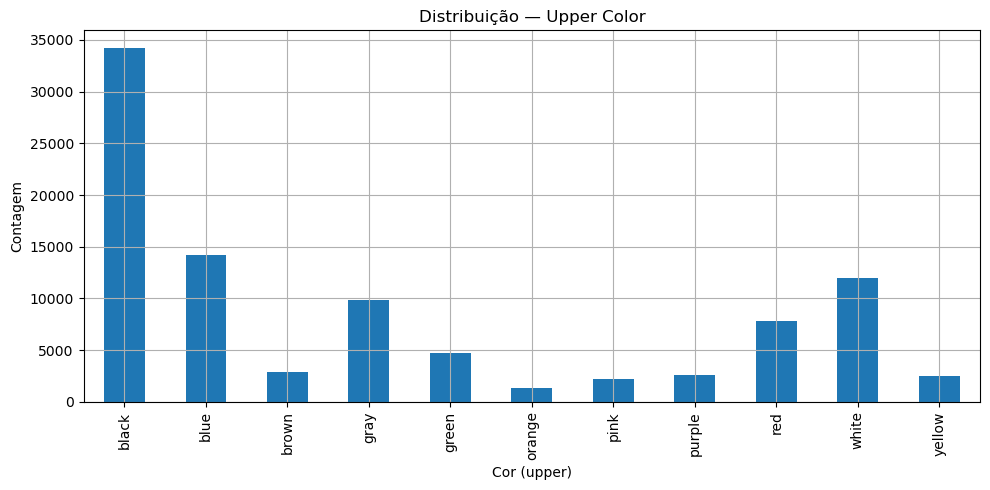

In [5]:

# Distribuição de upper_color
counts_upper = df["upper_color_name"].value_counts().sort_index()
plt.figure()
counts_upper.plot(kind="bar")
plt.title("Distribuição — Upper Color")
plt.xlabel("Cor (upper)")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()


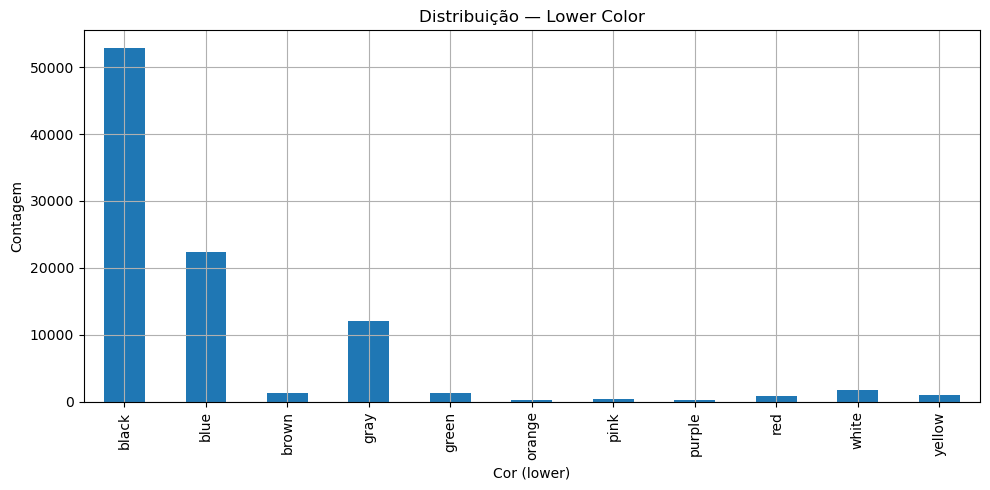

In [6]:

# Distribuição de lower_color
counts_lower = df["lower_color_name"].value_counts().sort_index()
plt.figure()
counts_lower.plot(kind="bar")
plt.title("Distribuição — Lower Color")
plt.xlabel("Cor (lower)")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()


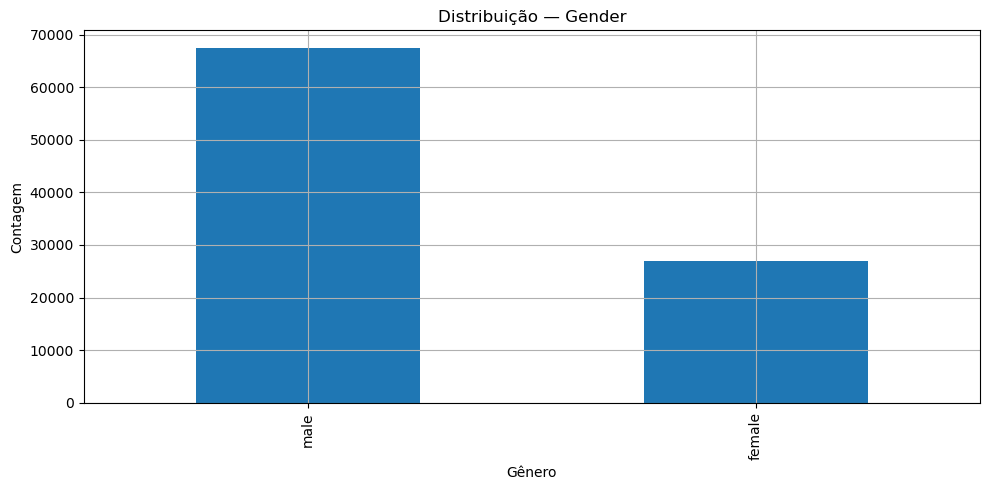

In [7]:

# Distribuição de gender
counts_gender = df["gender_name"].value_counts()
plt.figure()
counts_gender.plot(kind="bar")
plt.title("Distribuição — Gender")
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()


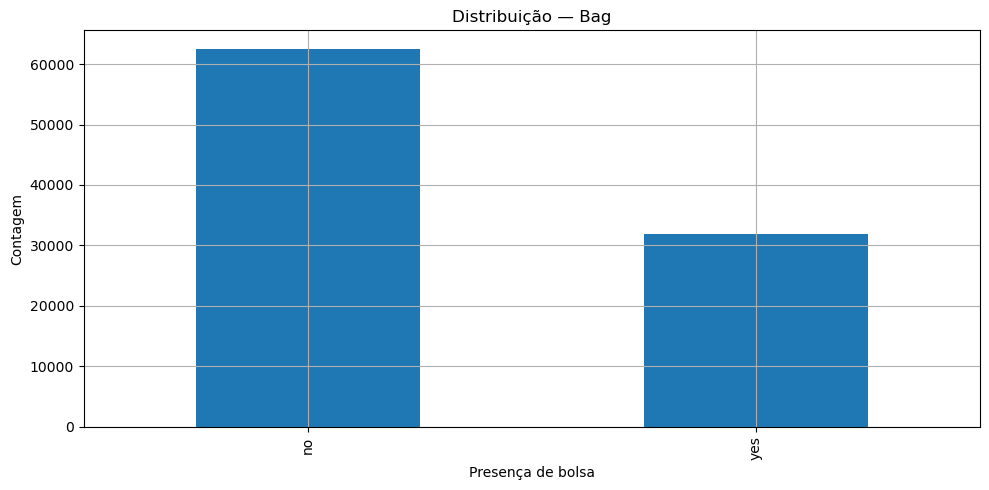

In [8]:

# Distribuição de bag
counts_bag = df["bag_name"].value_counts().sort_index()
plt.figure()
counts_bag.plot(kind="bar")
plt.title("Distribuição — Bag")
plt.xlabel("Presença de bolsa")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()


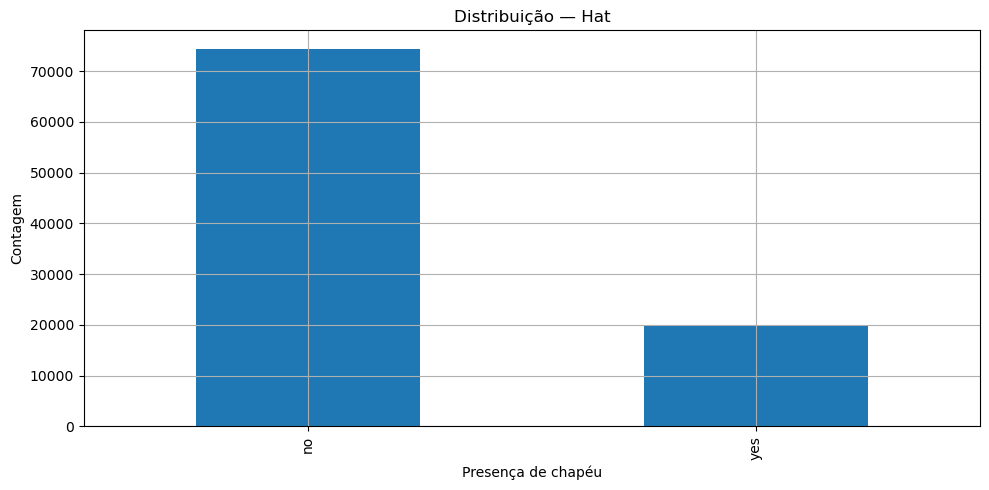

In [9]:

# Distribuição de hat
counts_hat = df["hat_name"].value_counts().sort_index()
plt.figure()
counts_hat.plot(kind="bar")
plt.title("Distribuição — Hat")
plt.xlabel("Presença de chapéu")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()


## 5. Relações Simples (Crosstabs)

Algumas tabelas de contingência para entender coocorrências básicas.


In [10]:

# Gênero vs bolsa/chapéu
ct_gender_bag = pd.crosstab(df["gender_name"], df["bag_name"], normalize="index")
ct_gender_hat = pd.crosstab(df["gender_name"], df["hat_name"], normalize="index")

print("Gênero x Bag (proporção por linha)")
display(ct_gender_bag.round(3))

print("\nGênero x Hat (proporção por linha)")
display(ct_gender_hat.round(3))


Gênero x Bag (proporção por linha)


bag_name,no,yes
gender_name,,
female,0.682,0.318
male,0.655,0.345



Gênero x Hat (proporção por linha)


hat_name,no,yes
gender_name,,
female,0.853,0.147
male,0.763,0.237


## 6. Inspecionar Amostras

Função para imprimir os atributos legíveis de uma amostra por índice (sem depender da imagem existir).

In [11]:

def show_attributes(idx: int):
    if idx < 0 or idx >= len(df):
        print(f"Índice fora do intervalo [0, {len(df)-1}]")
        return
    row = df.iloc[idx]
    print(f"Arquivo: {row['image_path']}")
    print(f"Upper color: {row['upper_color_name']} ({row['upper_color']})")
    print(f"Lower color: {row['lower_color_name']} ({row['lower_color']})")
    print(f"Gender: {row['gender_name']} ({row['gender']})")
    print(f"Bag: {row['bag_name']} ({row['bag']})")
    print(f"Hat: {row['hat_name']} ({row['hat']})")

# Exemplo rápido
show_attributes(0)


Arquivo: 1.jpg
Upper color: black (1)
Lower color: black (1)
Gender: male (0)
Bag: no (0)
Hat: no (0)


## 7. (Opcional) Exportar CSV Legível

Gera um CSV com colunas mapeadas para nomes, além das colunas originais.


In [12]:

export_path = "training_set_readable.csv"
df.to_csv(export_path, index=False)
print(f"Arquivo exportado: {export_path}")


Arquivo exportado: training_set_readable.csv
